In [1]:
import sys

In [2]:
sys.version

'3.9.12 | packaged by conda-forge | (main, Mar 24 2022, 23:25:59) \n[GCC 10.3.0]'

In [3]:
import numpy as np
import matplotlib.pyplot as plt  
import math   
import random   
import copy
import gmsh
import MEF
from scipy import linalg
from matplotlib import quiver
plt.rc('figure', figsize=(15,8))
plt.rc('font',size=22) 

Calcule las frecuencias naturales de oscilación transversal de una barra de acero (densidad 7850 kg/m3 y módulo de elasticidad E = 210 GPa), de 1 m de longitud, 10 cm2 de área, momento de inercia de 10 cm4. Realice el cálculo para un número variable de elementos y estudie la convergencia de sus resultados. Haga el cálculo para matrices de masa concentrada y consistente. Grafique los desplazamientos en función de la posición para los primeros modos normales.

In [4]:
E = 210E9
L= 1
A= 10E-4
dens= 7850
I= 10E-8 

In [5]:
glxn = 2
#MN= np.array([[0,0],[L/2,0],[L,0]])
Ne=15
Nn= Ne +1

In [6]:
MC = np.array([[i,i+1] for i in range(Ne)])
MN= np.linspace(0,L,Nn)
#MC= np.array([[0,1],[1,2]])

In [7]:
Ne,Nnxe= MC.shape
Nn= MN.shape[0]
l= L/Ne

In [8]:
#MN= np.array([[0,0],[l,0],[2*l,0]])

In [9]:
#Ne

In [10]:
K= (E*I/l**3)*np.array([[12 ,6*l ,-12 ,6*l],[6*l,4*l**2, -6*l,2*l**2],[-12,-6*l, 12, -6*l],
                        [6*l, 2*l**2, -6*l, 4*l**2]])

In [11]:
fe = np.abs(K.max()) #factor de escala

In [12]:
archivo= 'Matrices_ejercicio4_masa_consistente.txt'
with open(archivo,'w') as f:
    f.write('Matrices Elemental\n ===============')
archivo1= 'Matriz_global_ej4.txt'
with open(archivo1,'w') as f:
    f.write('Matriz Global\n ===============')

In [13]:
Kglobal = np.zeros([glxn*Nn,glxn*Nn])
k_elem= {}

<div style="background:#999900">este loop tendrías que tenerlo en el módulo MEF</div>

In [14]:
for e in range(Ne):       
    k_elem[e]= K
    with open(archivo,'a') as f:
        f.write(f'\nelemento {e}, fe ={fe:4e}\n')
        f.write(f'{K/fe}\n')
    
    for i in range(Nnxe):
        rangoi= np.linspace(i*glxn,(i+1)*glxn-1,Nnxe, dtype = "int")
        rangoni= np.linspace(MC[e,i]*glxn,(MC[e,i]+1)*glxn-1,Nnxe, dtype = "int")
        for j in range(Nnxe):
            rangoj= np.linspace(j*glxn,(j+1)*glxn-1,Nnxe, dtype = "int")
            rangonj= np.linspace(MC[e,j]*glxn,(MC[e,j]+1)*glxn-1,Nnxe, dtype = "int")
            Kglobal[np.ix_(rangoni,rangonj)] += k_elem[e][np.ix_(rangoi,rangoj)]

In [15]:
#Kglobal/Kglobal.max()

In [16]:
M= ((dens*A*l)/(420))*np.array([[156,22*l,54,-13*l],[22*l,4*l**2,13*l,-3*l**2],[54,13*l,156,-22*l],[-13*l,-3*l**2,-22*l,4*l**2]])

In [17]:
Mglobal = np.zeros([glxn*Nn,glxn*Nn])
m_elem= {}
fe = np.abs(M.max()) #factor de escala

In [18]:
archivo= 'Matrices_ejercicio1Guia4_masa_consistente.txt'
with open(archivo,'w') as f:
    f.write('Matrices masa elemental\n ===============')
archivo1= 'Matriz_de_masa_global_ej1.txt'
with open(archivo1,'w') as f:
    f.write('Matriz Masa Global\n ===============')

In [19]:
for e in range(Ne):       
    m_elem[e]= M
    with open(archivo,'a') as f:
        f.write(f'\nelemento {e}, fe ={fe:4e}\n')
        f.write(f'{M/fe}\n')
    
    for i in range(Nnxe):
        rangoi= np.linspace(i*glxn,(i+1)*glxn-1,Nnxe, dtype = "int")
        rangoni= np.linspace(MC[e,i]*glxn,(MC[e,i]+1)*glxn-1,Nnxe, dtype = "int")
        for j in range(Nnxe):
            rangoj= np.linspace(j*glxn,(j+1)*glxn-1,Nnxe, dtype = "int")
            rangonj= np.linspace(MC[e,j]*glxn,(MC[e,j]+1)*glxn-1,Nnxe, dtype = "int")
            Mglobal[np.ix_(rangoni,rangonj)] += m_elem[e][np.ix_(rangoi,rangoj)]

In [20]:
s=[0,1]
#r=[2,3,4,5,6,7]
r = np.array([i for i in range(Nn*glxn) if i not in s ])

In [21]:
Us = np.array([0,0])

In [22]:
omega2,autovect= linalg.eigh(Kglobal[np.ix_(r,r)],Mglobal[np.ix_(r,r)])

In [23]:
frec= np.sqrt(omega2)/(2*np.pi)

In [24]:
autovect= np.vstack((np.zeros([2,autovect.shape[1]]),autovect))

In [25]:
desplazamientos = autovect[0::2, :]
angulos = autovect[1::2, :]

In [26]:
desp_norm = desplazamientos/desplazamientos[-1, :]

V(x)*cos(wt)

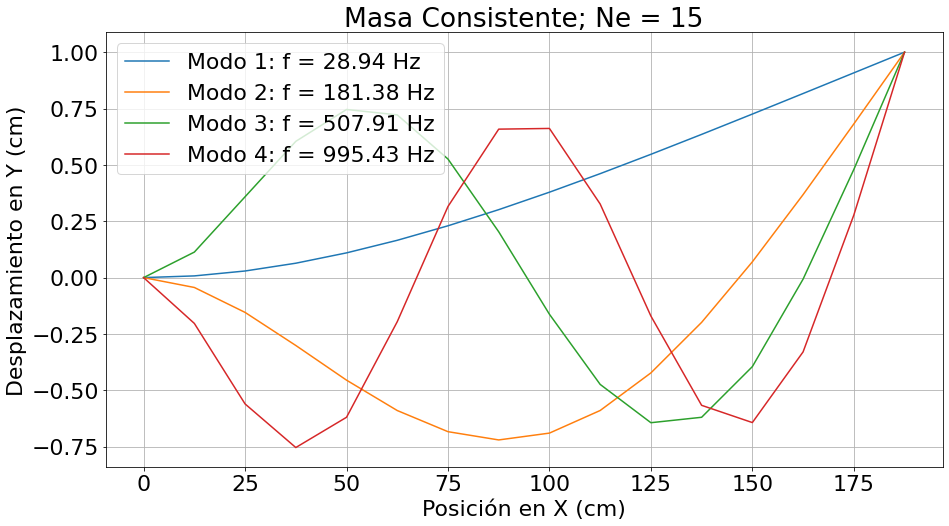

In [27]:
for i in range(4):   # Grafico los primeros 4 modos normales.
    plt.plot(np.arange(Ne+1)*12.5, desp_norm[:, i], label='Modo '+str(i+1)+': f = '+str(round(frec[i], 2))+' Hz')
plt.legend()
plt.grid()
plt.title('Masa Consistente; Ne = 15')
plt.xlabel('Posición en X (cm)')
plt.ylabel('Desplazamiento en Y (cm)')
plt.show()

## Masa Concentrada

In [28]:
Mconc = (dens*A*l/24)*np.array([[12, 0, 0, 0],
                                [0, l**2, 0, 0],
                                [0, 0, 12, 0],
                                [0, 0, 0, l**2]])

In [29]:
archivo= 'Matrices_ejercicio4_masa concentrada.txt'
with open(archivo,'w') as f:
    f.write('Matrices Elemental\n ===============')
archivo1= 'Matriz_global_ej4.txt'
with open(archivo1,'w') as f:
    f.write('Matriz Global\n ===============')

In [30]:
Kglobal_conc = np.zeros([glxn*Nn,glxn*Nn])
k_elem_conc= {}

<div style="background:#999900">este loop tendrías que tenerlo en el módulo MEF y está repetido de mas arriva</div>

In [31]:
for e in range(Ne):       
    k_elem_conc[e]= K
    with open(archivo,'a') as f:
        f.write(f'\nelemento {e}, fe ={fe:4e}\n')
        f.write(f'{K/fe}\n')
    
    for i in range(Nnxe):
        rangoi= np.linspace(i*glxn,(i+1)*glxn-1,Nnxe, dtype = "int")
        rangoni= np.linspace(MC[e,i]*glxn,(MC[e,i]+1)*glxn-1,Nnxe, dtype = "int")
        for j in range(Nnxe):
            rangoj= np.linspace(j*glxn,(j+1)*glxn-1,Nnxe, dtype = "int")
            rangonj= np.linspace(MC[e,j]*glxn,(MC[e,j]+1)*glxn-1,Nnxe, dtype = "int")
            Kglobal_conc[np.ix_(rangoni,rangonj)] += k_elem_conc[e][np.ix_(rangoi,rangoj)]

In [32]:
Mglobal_conc = np.zeros([glxn*Nn,glxn*Nn])
m_elem_conc= {}
fe = np.abs(M.max()) #factor de escala

In [33]:
archivo= 'Matrices_ejercicio1Guia4_masa_concentrada.txt'
with open(archivo,'w') as f:
    f.write('Matrices masa elemental\n ===============')
archivo1= 'Matriz_de_masa_global_ej1.txt'
with open(archivo1,'w') as f:
    f.write('Matriz Masa Global\n ===============')

In [34]:
for e in range(Ne):       
    m_elem_conc[e]= Mconc
    with open(archivo,'a') as f:
        f.write(f'\nelemento {e}, fe ={fe:4e}\n')
        f.write(f'{M/fe}\n')
    
    for i in range(Nnxe):
        rangoi= np.linspace(i*glxn,(i+1)*glxn-1,Nnxe, dtype = "int")
        rangoni= np.linspace(MC[e,i]*glxn,(MC[e,i]+1)*glxn-1,Nnxe, dtype = "int")
        for j in range(Nnxe):
            rangoj= np.linspace(j*glxn,(j+1)*glxn-1,Nnxe, dtype = "int")
            rangonj= np.linspace(MC[e,j]*glxn,(MC[e,j]+1)*glxn-1,Nnxe, dtype = "int")
            Mglobal_conc[np.ix_(rangoni,rangonj)] += m_elem_conc[e][np.ix_(rangoi,rangoj)]

In [35]:
#r,s son los mismos que antes

In [36]:
omega2_conc,autovect_conc= linalg.eigh(Kglobal_conc[np.ix_(r,r)],Mglobal_conc[np.ix_(r,r)])

In [37]:
frec_conc= np.sqrt(omega2_conc)/(2*np.pi)

In [38]:
autovect_conc= np.vstack((np.zeros([2,autovect_conc.shape[1]]),autovect_conc))

In [39]:
desplazamientos_conc = autovect_conc[0::2, :]
angulos_conc = autovect_conc[1::2, :]

In [40]:
desp_norm_conc = desplazamientos_conc/desplazamientos_conc[-1, :]

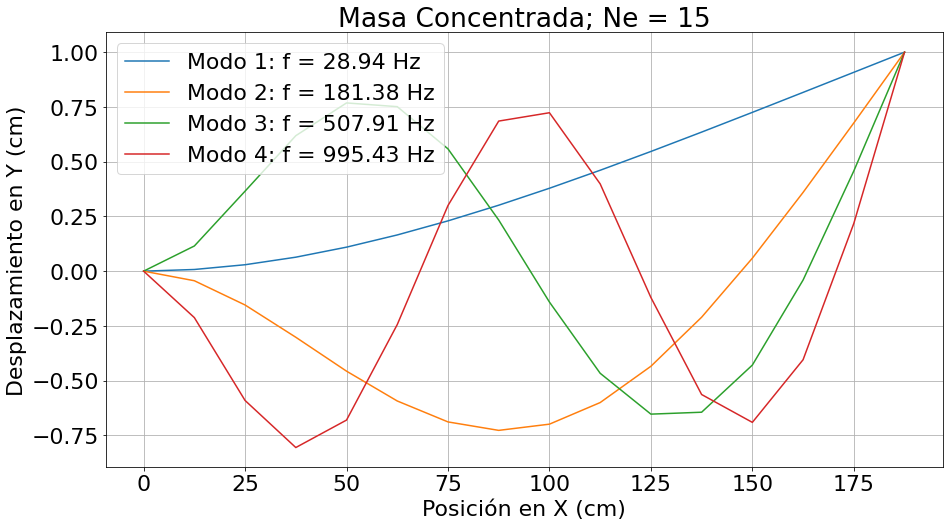

In [41]:
for i in range(4):   # Grafico los primeros 4 modos normales.
    plt.plot(np.arange(Ne+1)*12.5, desp_norm_conc[:, i], label='Modo '+str(i+1)+': f = '+str(round(frec[i], 2))+' Hz')
plt.legend()
plt.grid()
plt.title('Masa Concentrada; Ne = 15')
plt.xlabel('Posición en X (cm)')
plt.ylabel('Desplazamiento en Y (cm)')
plt.show()

## Comparación Grafica

<div style="background:#999900">en el label estas usando la misma frecuencia para los dos tipos de masas</div>

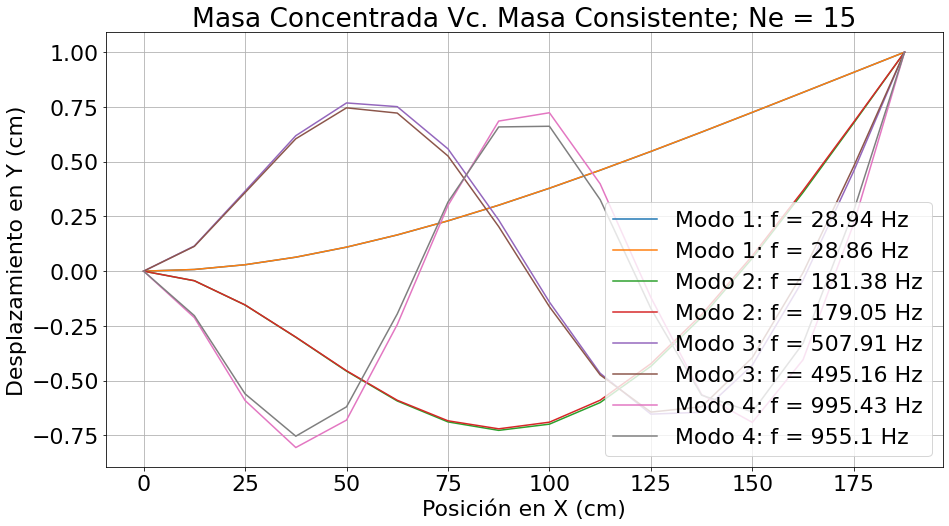

In [42]:
for i in range(4):   # Grafico los primeros 4 modos normales.
    plt.plot(np.arange(Ne+1)*12.5, desp_norm_conc[:, i], label='Modo '+str(i+1)+': f = '+str(round(frec[i], 2))+' Hz')
# para que queden bien los valores    plt.plot(np.arange(Ne+1)*12.5, desp_norm[:, i], label='Modo '+str(i+1)+': f = '+str(round(frec[i], 2))+' Hz')
    plt.plot(np.arange(Ne+1)*12.5, desp_norm[:, i], label='Modo '+str(i+1)+': f = '+str(round(frec_conc[i], 2))+' Hz')
plt.legend()
plt.grid()
plt.title('Masa Concentrada Vc. Masa Consistente; Ne = 15')
plt.xlabel('Posición en X (cm)')
plt.ylabel('Desplazamiento en Y (cm)')
plt.show()

<div style="background:#999900"> lo que hay que comparar es la convergencia de los modos con uno y otro método, como acá: </div>

In [43]:
from IPython.display import Image
from IPython.core.display import HTML

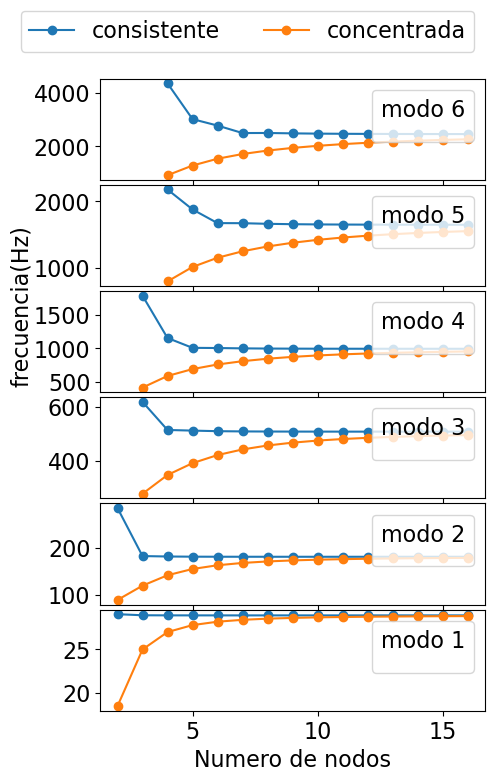

In [44]:
path='../../../EjemplosEnClase/Guia4/FrecuanciavsN.png'
Image(path)